In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import yfinance as yf
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [4]:
ff_factor_data.describe()
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.35,0.43,-1.23,0.44,0.00
2010-02,3.40,1.51,3.22,-0.28,1.40,0.00
2010-03,6.31,1.85,2.21,-0.63,1.67,0.01
2010-04,2.00,4.98,2.89,0.70,1.74,0.01
2010-05,-7.89,0.04,-2.44,1.27,-0.23,0.01
...,...,...,...,...,...,...
2017-08,0.16,-1.82,-2.07,0.12,-2.35,0.09
2017-09,2.51,4.74,3.09,-1.50,1.63,0.09
2017-10,2.25,-1.95,0.22,0.85,-3.23,0.09


In [5]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010',end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [6]:
ff_portfolio_data.describe()
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,-1.88,0.65,-5.21,-4.70,-3.69,1.49,0.55,-0.45,1.56,-1.53,1.27,0.67,1.50,2.11,-1.43,-1.31,1.68
2017-09,-0.28,-1.21,10.89,0.94,4.49,6.92,0.56,7.73,3.63,7.29,5.61,7.45,4.69,-2.06,0.65,5.13,0.18
2017-10,0.88,1.25,0.28,3.15,-1.65,4.70,-3.68,3.95,2.14,1.63,5.99,1.09,-0.34,2.98,3.89,3.30,2.47


In [7]:
df = (pd.read_csv(r'C:\Users\Wendel\OneDrive\Machine-Learning-for-Algorithmic-Trading-Second-Edition\data\wiki_prices\teste.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
                 .sort_index())

In [8]:
prices = df.adj_close.unstack().loc['2010':'2017']
prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.354133,NaN,12.394092,NaN,14.391425,NaN,5.472257,39.554636,27.503268,NaN,...,2.95,1.78,2.70,NaN,58.049747,NaN,NaN,2.24,NaN,12.360
2010-01-05,21.122172,NaN,13.797197,NaN,14.520197,NaN,5.313483,39.319541,27.550818,NaN,...,3.05,1.70,2.69,NaN,59.887376,NaN,NaN,2.19,NaN,12.290
2010-01-06,21.047125,NaN,13.225561,NaN,14.520197,NaN,5.102695,39.662387,27.112585,NaN,...,3.08,1.70,2.69,NaN,59.868033,NaN,NaN,2.19,NaN,12.680
2010-01-07,21.019836,NaN,13.615313,NaN,14.637558,NaN,5.291583,39.652592,27.062465,NaN,...,3.04,2.22,2.70,NaN,61.241419,NaN,NaN,2.21,NaN,14.660
2010-01-08,21.013013,NaN,13.355478,NaN,14.539757,NaN,5.354545,39.809321,27.242385,NaN,...,3.10,2.12,2.78,NaN,59.955078,NaN,NaN,2.23,NaN,14.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,67.350000,49.99,52.590000,77.8,40.260000,39.96,36.750000,100.550000,175.010000,37.74,...,4.05,4.45,NaN,NaN,NaN,4.00,17.19,NaN,71.99,21.450
2017-12-26,67.250000,50.38,52.850000,77.8,40.360000,38.91,36.600000,101.960000,170.570000,37.95,...,4.07,4.44,NaN,NaN,NaN,3.95,17.07,NaN,72.34,21.850
2017-12-27,67.300000,51.84,52.400000,74.0,40.600000,38.66,36.500000,99.770000,170.600000,37.91,...,4.03,4.56,NaN,NaN,NaN,4.01,17.57,NaN,72.45,21.150


In [9]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns

ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,ZEUS,ZIGO,ZINC,ZION,ZIOP,ZIXI,ZLC,ZMH,ZQK,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,38.041431,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-0.220951,-7.459868,3.775510,-2.212411,6.389776,2.659574,8.715596,1.793324,27.227723,12.647290
2010-03,9.313414,0.272851,13.068473,7.509506,2.887175,14.847034,17.679681,7.089405,3.138374,-4.215479,...,18.040492,-5.816327,16.420846,17.799353,52.552553,19.689119,15.611814,3.261818,84.046693,42.887029
2010-04,5.437627,-3.809524,3.646409,6.763926,7.585878,11.102128,4.184731,-4.771975,6.673582,23.255814,...,-2.664625,2.383532,0.337838,31.547619,16.535433,6.926407,18.978102,2.888514,12.684989,-9.419229
2010-05,-10.755654,24.893918,-14.658849,2.194617,14.767184,-1.612471,-5.427899,-13.063628,1.658232,1.257862,...,-13.214885,-15.132275,-12.205387,-16.606132,-14.695946,-4.858300,-17.177914,-8.175997,-12.570356,-7.758621
2010-06,-12.144623,-2.491506,-14.363696,-4.808984,-2.938203,-2.082685,-9.125694,-4.797868,1.502558,-13.874292,...,-16.654572,1.122195,-27.516779,-9.937370,-37.029703,-3.829787,-41.481481,-3.361345,-20.600858,-5.899533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,8.245526,-11.117858,-4.343129,-3.550296,-12.597090,10.625073,12.457912,-1.357917,-14.073315,-3.820961,...,6.905658,0.000000,0.000000,-3.406683,15.551537,-0.375235,0.000000,0.000000,0.000000,-1.968504
2017-09,-0.803461,6.146625,-1.383225,5.751534,1.392784,-6.024390,-1.497006,-3.396798,3.115265,9.080827,...,20.547945,0.000000,0.000000,8.062300,-3.912363,-7.909605,0.000000,0.000000,0.000000,45.381526
2017-10,6.181355,-1.410823,-15.654366,1.522843,-17.600806,9.680768,-6.762918,8.398656,-7.009063,-0.104275,...,-14.181818,0.000000,0.000000,-1.526070,-24.104235,-0.817996,0.000000,0.000000,0.000000,-2.486188


In [10]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 2602 entries, A to ZUMZ
dtypes: float64(2602)
memory usage: 1.9 MB


In [79]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_portfolio_data = ff_portfolio_data.loc[returns.index]

In [80]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,1.206316,0.058105,-0.055368,0.146947,0.040842,0.012737
std,3.568555,2.311564,2.211178,1.585129,1.417727,0.022665
min,-7.890000,-4.580000,-4.700000,-3.880000,-3.230000,0.000000
25%,-0.565000,-1.665000,-1.660000,-0.865000,-0.960000,0.000000
50%,1.290000,0.160000,-0.300000,0.260000,0.000000,0.000000
75%,3.265000,1.585000,1.190000,1.240000,0.940000,0.010000
max,11.350000,7.040000,8.210000,3.450000,3.700000,0.090000


In [11]:
#Excess Returns
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Columns: 2602 entries, A to ZUMZ
dtypes: float64(2602)
memory usage: 1.9 MB


In [12]:
excess_returns = excess_returns.clip(lower=np.percentile(excess_returns,1),
                                    upper=np.percentile(excess_returns,99))

In [14]:
ff_portfolio_data.info()
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 5 columns):
 #   Colum

In [15]:
betas = []

for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry],
                exog=add_constant(ff_factor_data)).fit()
    betas.append(step1.params.drop('const'))

In [16]:
betas = pd.DataFrame(betas, columns=ff_factor_data.columns,
                    index=ff_portfolio_data.columns)
betas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Food  to Other
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  17 non-null     float64
 1   SMB     17 non-null     float64
 2   HML     17 non-null     float64
 3   RMW     17 non-null     float64
 4   CMA     17 non-null     float64
dtypes: float64(5)
memory usage: 1.3+ KB


In [17]:
betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.683260,-0.310867,-0.358437,0.300164,0.493591
Mines,1.348491,0.180913,0.220930,0.290605,0.520882
Oil,1.042306,0.163806,0.640468,0.004696,0.325614
Clths,0.964850,0.364607,-0.132272,0.626524,-0.048815
Durbl,1.171409,0.532088,0.069480,0.532144,-0.123363
Chems,1.348194,0.180037,0.190092,0.160015,-0.238743
Cnsum,0.750683,-0.342736,-0.564389,-0.081340,0.601006
Cnstr,1.113969,0.427150,0.089907,-0.022794,0.169047
Steel,1.502803,0.417009,0.420544,0.254229,0.421829
FabPr,1.064707,0.464527,-0.041184,0.150311,0.202631


In [18]:
lambdas = []

for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index],
                exog=betas).fit()
    lambdas.append(step2.params)

In [19]:
lambdas = pd.DataFrame(lambdas,
                        index = ff_portfolio_data.index,
                        columns=betas.columns.tolist())
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01,-3.474892,3.869179,-6.088475,-4.405357,-3.089178
2010-02,3.778057,5.058710,-1.020295,2.367460,-0.762315
2010-03,6.244846,-0.066182,-0.229395,2.637441,-1.770347
2010-04,1.825380,8.312914,-4.186898,-2.309371,-2.037472
2010-05,-7.719723,2.802826,-0.234375,1.750617,-0.069525
...,...,...,...,...,...
2017-08,0.387656,-0.195765,-2.585961,-3.743803,0.294423
2017-09,3.062003,6.879362,1.022467,-5.146970,0.124447
2017-10,2.398506,-2.546326,0.373777,1.958747,-4.073634


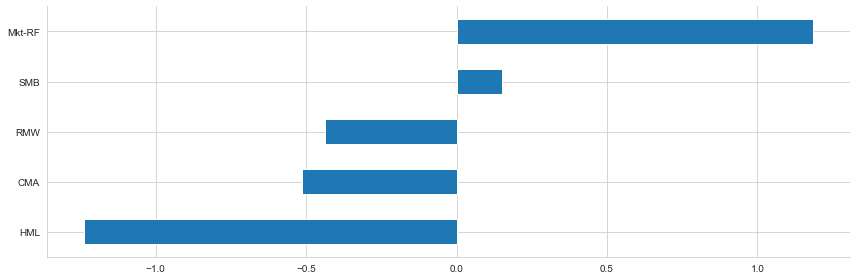

In [20]:
lambdas.mean().sort_values().plot.barh(figsize=(12,4))
sns.despine()
plt.tight_layout()